# Task 2 - Exploratory Data Analysis

This notebook explores the raw transaction data to understand structure, quality, and relationships that inform feature engineering for credit risk modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set_theme(style="whitegrid")

In [2]:
data_path = Path('..') / 'data' / 'raw' / 'data.csv'
df = pd.read_csv(data_path)
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


## Overview

Basic structure (rows, columns) and data types.

In [3]:
df_shape = df.shape
df_info = df.dtypes.to_frame(name='dtype')
print('Shape:', df_shape)
df_info

Shape: (95662, 16)


,dtype
TransactionId,object
BatchId,object
AccountId,object
SubscriptionId,object
CustomerId,object
CurrencyCode,object
CountryCode,int64
ProviderId,object
ProductId,object
ProductCategory,object


## Summary Statistics

Overall descriptive stats for numeric and categorical fields.

In [4]:
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns
display(df[numeric_cols].describe().T)
display(df[categorical_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


,count,unique,top,freq,mean,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN
ChannelId,95662,4,ChannelId_3,56935,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Values

Count missing values per column.

In [5]:
missing = df.isna().sum().sort_values(ascending=False)
missing

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

## Distribution of Numerical Features

Inspect skewness and potential outliers for key numeric fields.

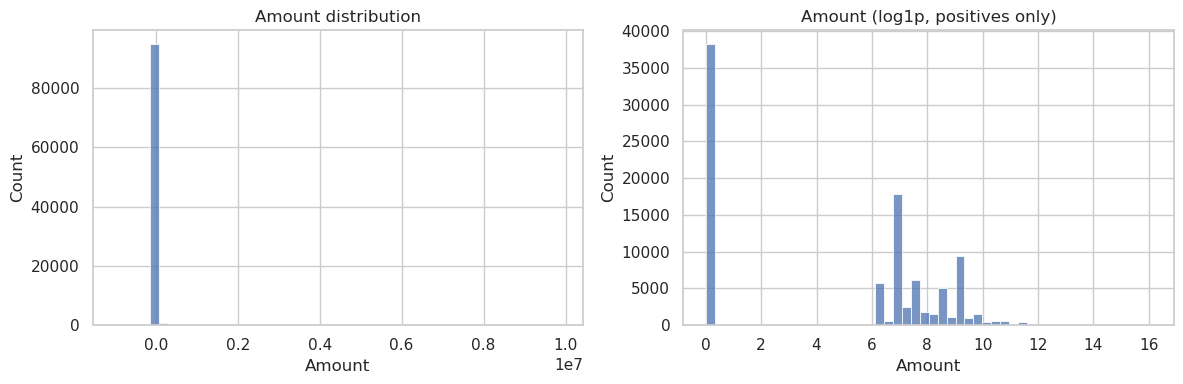

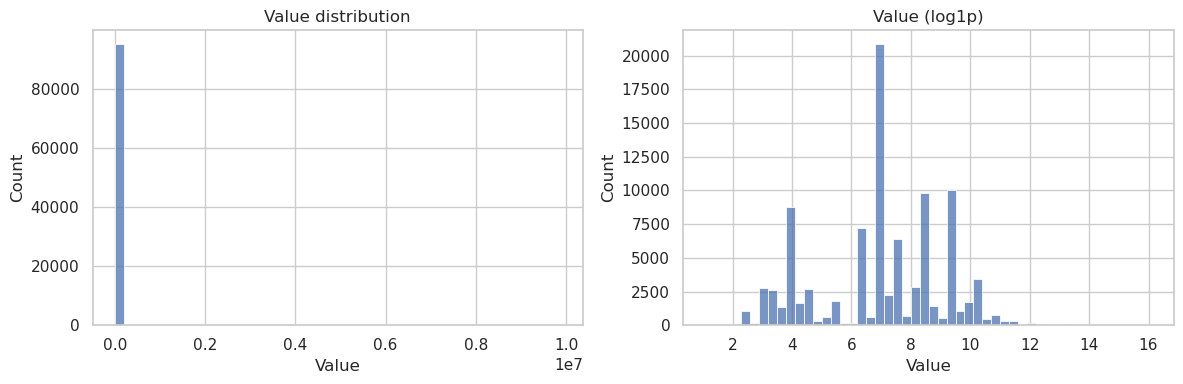

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Amount'], bins=50, ax=axes[0])
axes[0].set_title('Amount distribution')
sns.histplot(np.log1p(df['Amount'].clip(lower=0)), bins=50, ax=axes[1])
axes[1].set_title('Amount (log1p, positives only)')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Value'], bins=50, ax=axes[0])
axes[0].set_title('Value distribution')
sns.histplot(np.log1p(df['Value']), bins=50, ax=axes[1])
axes[1].set_title('Value (log1p)')
plt.tight_layout()
plt.show()

## Distribution of Categorical Features

Frequency of key categorical fields.

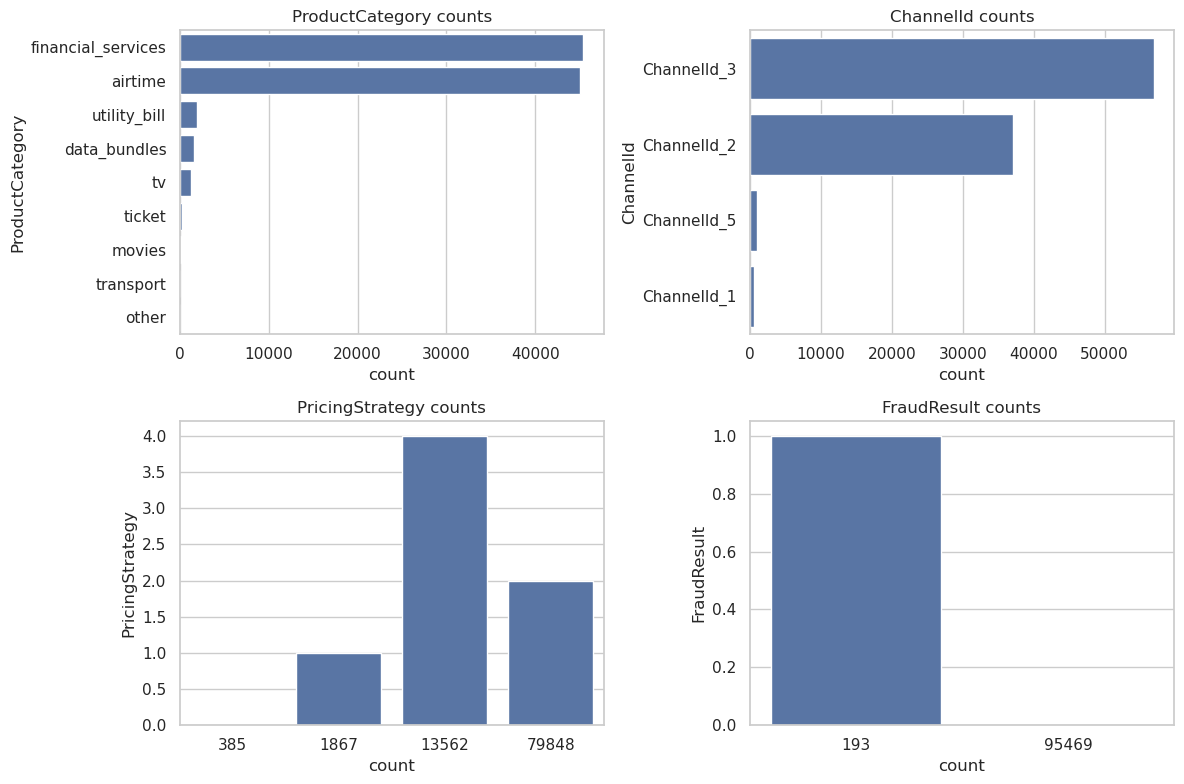

In [7]:
cat_cols_to_plot = ['ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for ax, col in zip(axes, cat_cols_to_plot):
    counts = df[col].value_counts().reset_index()
    counts.columns = [col, 'count']
    sns.barplot(data=counts, x='count', y=col, ax=ax)
    ax.set_title(f'{col} counts')
plt.tight_layout()
plt.show()

## Correlation Analysis

Correlations among numeric features, including target proxy (`FraudResult`).

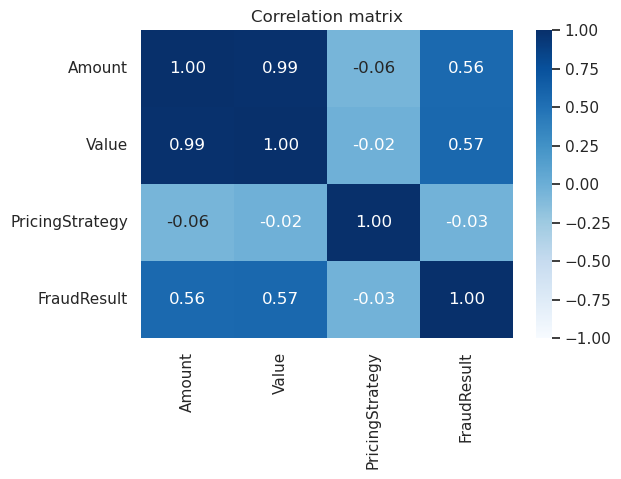

In [8]:
corr_cols = ['Amount', 'Value', 'PricingStrategy', 'FraudResult']
corr = df[corr_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

## Outlier Detection

Quick box plots to spot extreme values.

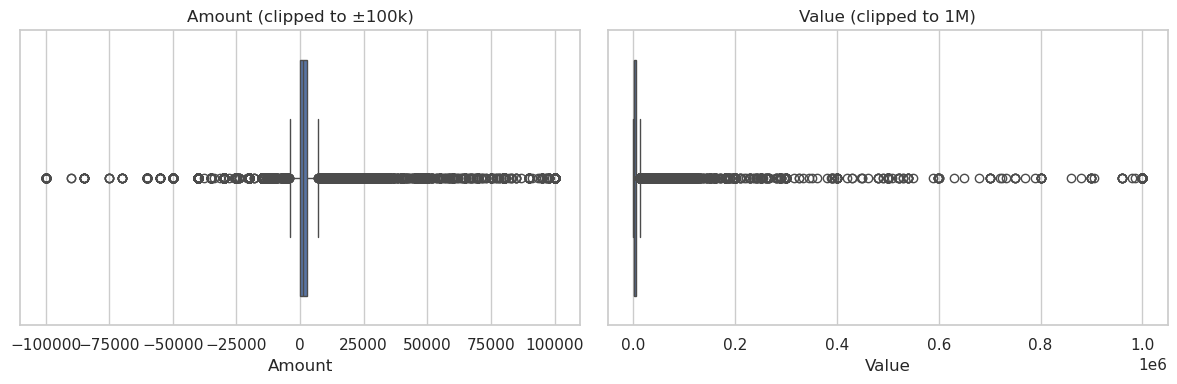

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x=df['Amount'].clip(-1e5, 1e5), ax=axes[0])
axes[0].set_title('Amount (clipped to ±100k)')
sns.boxplot(x=df['Value'].clip(0, 1e6), ax=axes[1])
axes[1].set_title('Value (clipped to 1M)')
plt.tight_layout()
plt.show()

## Key Insights

- `FraudResult` is highly imbalanced (193 positives out of 95k), so evaluation must use stratified splits and imbalance-aware metrics.
- `Amount` and `Value` are extremely skewed with large magnitude outliers and include negatives (likely reversals/adjustments); they correlate ~0.99 with each other and ~0.56 with `FraudResult`, suggesting potential leakage or threshold effects.
- Currency and country are single-valued (UGX, 256), offering no predictive signal; `ProductCategory` is dominated by `financial_services` and `airtime`, so rare categories may need grouping to avoid sparsity.
- Channel usage is concentrated in `ChannelId_3` and `ChannelId_2`; other channels are sparse and may need regularization or binning.
- No missing values detected, so focus can shift to handling imbalance, skew/outliers, and high-cardinality categorical fields (AccountId, CustomerId, etc.) for feature engineering.